In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.datasets import make_regression

from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

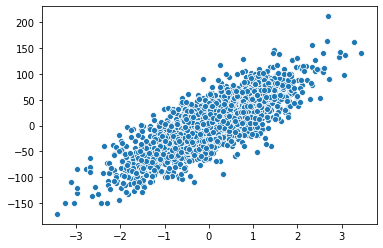

In [2]:
# Let's generate some data
X, y = make_regression(n_samples=2000, n_features=1, noise=30)
X = X.reshape(-1, 1)
plot = sns.scatterplot(X.ravel(), y)

In [3]:
X.shape

(2000, 1)

In [4]:
# preprocess for the models
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
# train the models
lin_reg = linear_model.LinearRegression().fit(X_train, y_train)
rf_reg = RandomForestRegressor(n_estimators=200, max_depth=15).fit(X_train, y_train)
ml_reg = MLPRegressor(random_state=0, max_iter=1000).fit(X_train, y_train)

In [6]:
# predict the values
pred_lr = lin_reg.predict(X_test)
pred_rf = rf_reg.predict(X_test)
pred_ml = ml_reg.predict(X_test)

# MODEL EVALUATION
#https://scikit-learn.org/stable/modules/model_evaluation.html

# Bias and variance
#https://www.analyticsvidhya.com/blog/2020/08/bias-and-variance-tradeoff-machine-learning/

![bias varince](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/08/Copy-of-Add-a-subheading5.png)

### Bias - model oversimplifies, does not pay attention to the training data -> underfitting
#### too much of bias - has high error on both, training and testing data
#### Linear machine learning algorithms often have a high bias but a low variance
#### Generaly parametric algorithm

### Variance - low generalization, too much attention to the trainning data -> overfitting
#### too much of variance - has high error on testing data and almost no error on training data
#### Nonlinear machine learning algorithms often have a low bias but a high variance

## error = bias^2 + variance + noise

### Solutions
#### HIGH BIAS: get more features, add polynomial features - make model more complicated
#### HIGH VARIANCE: more training examples, smallers sets of features

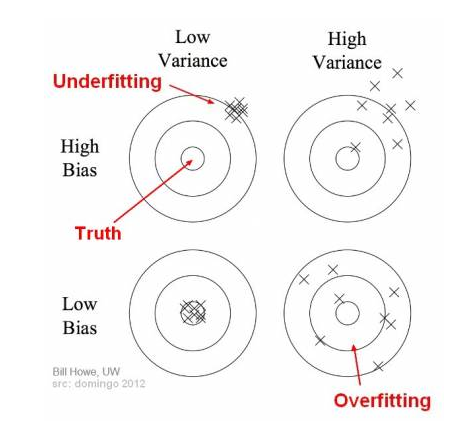

In [7]:
Image(filename='d:\\_PHD\ML_ensembles\\ML_ensembles\\figures\\bullseye.png') 

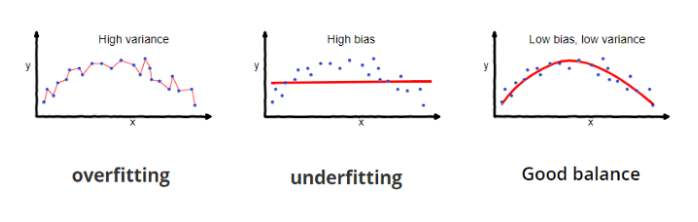

In [8]:
Image(filename='d:\\_PHD\ML_ensembles\\ML_ensembles\\figures\\balance.png') 

[Text(0.5, 0, 'predicted')]

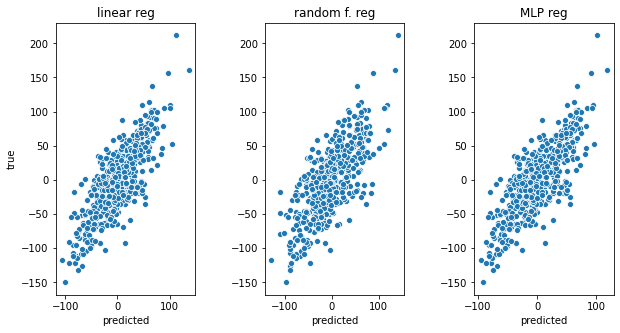

In [23]:
# let's look at the test set predicted values 
fig, axs = plt.subplots(ncols=3,figsize=(10, 5))
plt.subplots_adjust(wspace = 0.5)

sns.scatterplot(pred_lr.ravel(), y_test.ravel(), ax=axs[0]).set_title('linear reg')
sns.scatterplot(pred_rf.ravel(), y_test.ravel(), ax=axs[1]).set_title('random f. reg')
sns.scatterplot(pred_ml.ravel(), y_test.ravel(), ax=axs[2]).set_title('MLP reg')
axs[0].set(xlabel="predicted", ylabel = "true")
axs[1].set(xlabel="predicted")
axs[2].set(xlabel="predicted")

In [24]:
print('linear reg.:\n', pred_lr[:4])
print('random forest reg.:\n', pred_rf[:4])
print('MLP reg.:\n', pred_ml[:4])
print('true y:\n', y_test[:4])

linear reg.:
 [-19.1619084  -79.66131283  17.85245419 -33.2649508 ]
random forest reg.:
 [ -4.09225637 -66.39258306  17.31076454 -46.61432216]
MLP reg.:
 [-20.56274726 -77.46685325  17.9514888  -34.70694334]
true y:
 [ -47.47912374 -112.01093919   23.77082908  -27.12893001]


[Text(0.5, 0, 'predicted')]

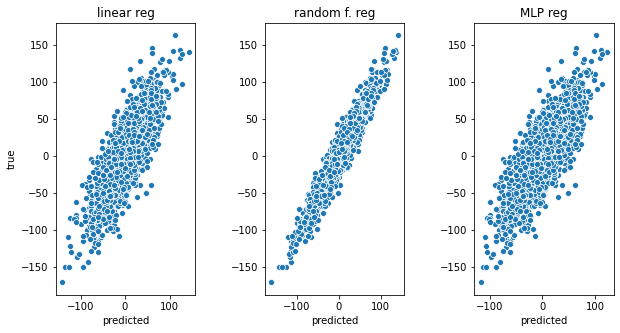

In [25]:
# same for the train set
pred_lr_train = lin_reg.predict(X_train)
pred_rf_train = rf_reg.predict(X_train)
pred_ml_train = ml_reg.predict(X_train)

fig, axs = plt.subplots(ncols=3,figsize=(10, 5))
plt.subplots_adjust(wspace = 0.5)


sns.scatterplot(pred_lr_train.ravel(), y_train.ravel(), ax=axs[0]).set_title('linear reg')
sns.scatterplot(pred_rf_train.ravel(), y_train.ravel(), ax=axs[1]).set_title('random f. reg')
sns.scatterplot(pred_ml_train.ravel(), y_train.ravel(), ax=axs[2]).set_title('MLP reg')
axs[0].set(xlabel="predicted", ylabel = "true")
axs[1].set(xlabel="predicted")
axs[2].set(xlabel="predicted")

In [12]:
print('linear reg.:\n', pred_lr_train[:4])
print('random forest reg.:\n', pred_rf_train[:4])
print('MLP reg.:\n', pred_ml_train[:4])
print('true y:\n', y_train[:4])

linear reg.:
 [ 75.64731456  16.11646878 -21.83027985  -0.6113278 ]
random forest reg.:
 [ 61.64317664  -1.70357658 -13.3391265  -19.30300303]
MLP reg.:
 [ 73.90087678  15.91920193 -23.23388492  -1.99293588]
true y:
 [ 48.07886292 -26.42080953 -25.34830547 -45.64898143]


# MAE

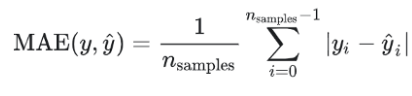

In [22]:
Image(filename='d:\\_PHD\ML_ensembles\\ML_ensembles\\figures\\mae.png') 
# MAE tells us how big error we can expect from the prediction on average

In [14]:
from sklearn.metrics import mean_absolute_error

mae_lr = mean_absolute_error(y_test, pred_lr)
mae_rf = mean_absolute_error(y_test, pred_rf)
mae_lr, mae_rf

(24.588661649751224, 28.183887741216957)

In [15]:
mae_lr_train = mean_absolute_error(y_train, pred_lr_train)
mae_rf_train = mean_absolute_error(y_train, pred_rf_train)
mae_lr_train, mae_rf_train

(23.081456526975714, 12.006956029311661)

# R squared

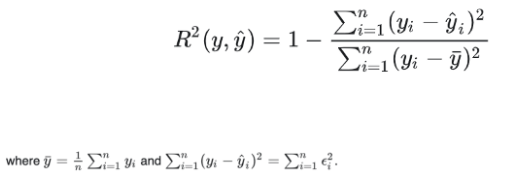

In [16]:
Image(filename='d:\\_PHD\ML_ensembles\\ML_ensembles\\figures\\R2.png')
# it says how well the model captures the variance in data

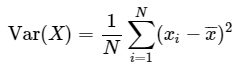

In [17]:
Image(filename='d:\\_PHD\ML_ensembles\\ML_ensembles\\figures\\var.png')
# variance

In [18]:
from sklearn.metrics import r2_score

r2_lr = r2_score(y_test, pred_lr)
r2_rf = r2_score(y_test, pred_rf)
r2_lr, r2_rf

(0.644667537291939, 0.5304664654055222)

In [19]:
r2_lr_train = r2_score(y_train, pred_lr_train)
r2_rf_train = r2_score(y_train, pred_rf_train)
r2_lr_train, r2_rf_train

(0.671078473648401, 0.9131155078532053)

In [20]:
# what model.score actualy does?
lin_reg.score(X_test, y_test), rf_reg.score(X_test, y_test)

(0.644667537291939, 0.5304664654055222)

# MSE

# RMSE